In [48]:
di = {'First 30 Days':42,'First 60 Days':139,'First 90 Days':297,'First 120 Days':744,'First 150 Days':1445}

In [49]:
import pandas as pd
pd.DataFrame(di,columns=['Days','Views'])

,Days,Views


In [50]:
di

{'First 30 Days': 42,
 'First 60 Days': 139,
 'First 90 Days': 297,
 'First 120 Days': 744,
 'First 150 Days': 1445}

In [51]:
l = [i for i in di.values()]

In [52]:
di.values()

dict_values([42, 139, 297, 744, 1445])

In [53]:
l1=[i for i in di.keys()]

In [54]:
print(l,'',l1)

[42, 139, 297, 744, 1445]  ['First 30 Days', 'First 60 Days', 'First 90 Days', 'First 120 Days', 'First 150 Days']


In [55]:
main = list(zip(l,l1))

In [56]:
di = {'First 30 Days':42,'First 60 Days':139,'First 90 Days':297,'First 120 Days':744,'First 150 Days':1445}

In [57]:
def dict_to_DataFrame(di):
    l = [i for i in di.values()]
    l1 = [i for i in di.keys()]
    main = list(zip(l1,l))
    df = pd.DataFrame(main,columns=['Days','Views'])
    return df
    

In [58]:
df = dict_to_DataFrame(di)

In [59]:
df

,Days,Views
0,First 30 Days,42
1,First 60 Days,139
2,First 90 Days,297
3,First 120 Days,744
4,First 150 Days,1445


In [60]:
# Now we have to predict the iews of Next month or for 'First 180 Days'
df['Views'].std()

576.2545444506273

In [61]:
import statistics 

In [62]:
statistics.variance(df['Views'])

332069.3

In [63]:
x=df['Views'].std()

In [64]:
x**2 #Variance = std**2

332069.30000000005

In [65]:
l[4]

1445

In [66]:
len(l)

5

### Creating column 'Frequency' which will show the views per 30 Days of interval

In [67]:
l2=[]
for i in range(len(l)):
    if i>0:
        l2.append(l[i]-l[i-1])
    else:
        l2.append(l[i])

In [68]:
l2

[42, 97, 158, 447, 701]

In [69]:
df['Frequency'] = pd.DataFrame(l2,columns=['CF'])

In [70]:
df

,Days,Views,Frequency
0,First 30 Days,42,42
1,First 60 Days,139,97
2,First 90 Days,297,158
3,First 120 Days,744,447
4,First 150 Days,1445,701


In [71]:
len(df['Days'][0])

13

In [72]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Days', ylabel='Views'>

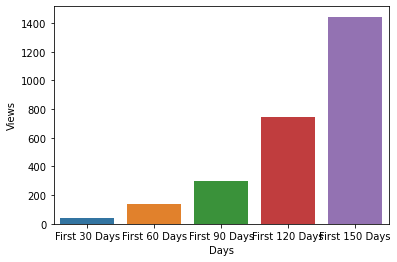

In [74]:
sns.barplot(x=df['Days'],y=df['Views'],data=df)

<AxesSubplot:xlabel='Days', ylabel='Frequency'>

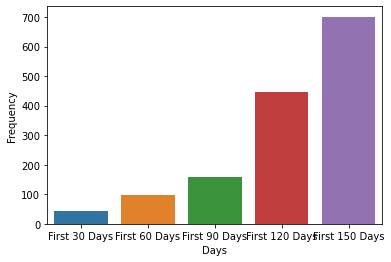

In [75]:
sns.barplot(x=df['Days'],y=df['Frequency'],data=df)

### Creating another column as 'Rate of Change in Frequency'

In [76]:
l3=[]
for i in range(len(l)):
    if i>0:
        l3.append(round(l2[i]/l2[i-1],2))
    else:
        l3.append(0)

In [77]:
df['Rate of Change in Frequency'] = pd.DataFrame(l3,columns=['Rate of Change'])

In [78]:
df

,Days,Views,Frequency,Rate of Change in Frequency
0,First 30 Days,42,42,0.00
1,First 60 Days,139,97,2.31
2,First 90 Days,297,158,1.63
3,First 120 Days,744,447,2.83
4,First 150 Days,1445,701,1.57


### We are predicting views for 180 days using standard deviation

In [79]:
x1 = round(df['Rate of Change in Frequency'].std(),2)

In [80]:
variance = x1**2

In [81]:
print(x1,variance)

1.07 1.1449


In [82]:
cf_180_days = df['Frequency'].iloc[-1]*x1

In [83]:
First_180_days = df['Views'].iloc[-1]+cf_180_days

In [84]:
print('Total Views after 180 days would be around :',round(First_180_days))

Total Views after 180 days would be around : 2195


In [85]:
df

,Days,Views,Frequency,Rate of Change in Frequency
0,First 30 Days,42,42,0.00
1,First 60 Days,139,97,2.31
2,First 90 Days,297,158,1.63
3,First 120 Days,744,447,2.83
4,First 150 Days,1445,701,1.57


In [86]:
0.2-0.02

0.18000000000000002

In [87]:
0.18+0.02

0.19999999999999998

In [90]:
def inputdf(df):
    l1= [input('Enter the Days:')]
    l2= [int(input('Enter the actual views:'))]
    l3= l2 - df['Views'].iloc[-1] #frequency
    l4= l3/df['Frequency'].iloc[-1]
    df1 = pd.DataFrame(list(zip(l1,l2,l3,l4)),columns=df.columns)
    final_df = pd.concat([df,df1],ignore_index=True)
    return final_df

In [91]:
inputdf(df)

Enter the Days:First 180 days
Enter the actual views:2128


,Days,Views,Frequency,Rate of Change in Frequency
0,First 30 Days,42,42,0.000000
1,First 60 Days,139,97,2.310000
2,First 90 Days,297,158,1.630000
3,First 120 Days,744,447,2.830000
4,First 150 Days,1445,701,1.570000
5,First 180 days,2128,683,0.974322
